<a href="https://colab.research.google.com/github/stuckic/posCimatec/blob/main/Trabalho_3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 Trabalho em Grupo - Aprendizagem de Máquina
# Equipe  
Carlos Bastos Stucki  
Juliana Rappel  
Reinaldo Góes  



In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings("ignore")

In [ ]:
# Passo 1: Carregamento do csv
uploaded = files.upload()
file_name = next(iter(uploaded))

Saving Altura, Peso, Gênero (1) (1).csv to Altura, Peso, Gênero (1) (1) (1).csv


In [ ]:
# 1. Abra o arquivo e leia todas as linhas
with open(file_name, 'r') as file:
    lines = file.readlines()

# 2. Substitua o padrão de número, por exemplo, 1,87 por 1.87 nas linhas, exceto na primeira
pattern = r'(\d+),(\d+)'
replacement = r'\1.\2'
corrected_lines_0 = [re.sub(pattern, replacement, line) if index > 0 else line\
                     for index, line in enumerate(lines)]

# 3. Substitua todas as ocorrências de ',"' por ',' nas linhas, exceto na primeira
corrected_lines_1 = [line.replace('","', ',') if index > 0 else line for index, \
                     line in enumerate(corrected_lines_0)]

# 4. Substitua todas as ocorrências restantes de '"' por nada nas linhas, exceto na primeira
corrected_lines_2 = [line.replace('"', '') if index > 0 else line for index,\
                     line in enumerate(corrected_lines_1)]

# 5. Junte as linhas corrigidas em uma única string
corrected_content = ''.join(corrected_lines_2)

# 6. Salve o conteúdo corrigido no arquivo original
with open(file_name, 'w') as file:
    file.write(corrected_content)

# 7. Carregue o arquivo no pandas DataFrame
data = pd.read_csv(file_name, sep=',')

data.head()

,Carimbo de data/hora,Qual a sua altura?,Qual o seu peso?,Qual o seu gênero?
0,2023/08/25 3:48:27 PM GMT-3,1.86,98,Masculino
1,2023/08/25 3:48:47 PM GMT-3,1.72,76,Masculino
2,2023/08/25 3:54:35 PM GMT-3,1.81,82,Masculino
3,2023/08/25 4:14:46 PM GMT-3,1.92,85,Masculino
4,2023/08/25 4:18:25 PM GMT-3,1.67,84,Feminino


In [ ]:
# Transforma a coluna de gênero em uma label binária: 1 para '"Masculino"' e 0 para outros valores
data['Label'] = data.iloc[:, 3].apply(lambda x: 1 if x == 'Masculino' else 0)

# Correções no conjunto de dados:

# Corrigindo erros específicos (se necessário)
data.iloc[:, 1:3] = data.iloc[:, 1:3].replace('175', '1,75', regex=True)

# Removendo 'kg'
data.iloc[:, 1:3] = data.iloc[:, 1:3].replace('kg', '', regex=True)

# Trocando vírgulas por pontos
data.iloc[:, 1:3] = data.iloc[:, 1:3].replace(',', '.', regex=True)

# Converte as colunas corrigidas para float
data.iloc[:, 1:3] = data.iloc[:, 1:3].astype(float)

print(data)

           Carimbo de data/hora  Qual a sua altura?  Qual o seu peso?  \
0   2023/08/25 3:48:27 PM GMT-3                1.86              98.0   
1   2023/08/25 3:48:47 PM GMT-3                1.72              76.0   
2   2023/08/25 3:54:35 PM GMT-3                1.81              82.0   
3   2023/08/25 4:14:46 PM GMT-3                1.92              85.0   
4   2023/08/25 4:18:25 PM GMT-3                1.67              84.0   
..                          ...                 ...               ...   
80  2023/09/14 8:47:22 PM GMT-3                1.71              60.0   
81  2023/09/14 8:50:10 PM GMT-3                1.82              77.8   
82  2023/09/14 8:50:53 PM GMT-3                1.67              63.0   
83  2023/09/14 8:53:28 PM GMT-3                1.62              58.0   
84  2023/09/14 9:07:36 PM GMT-3                1.76              95.0   

   Qual o seu gênero?  Label  
0           Masculino      1  
1           Masculino      1  
2           Masculino      1  

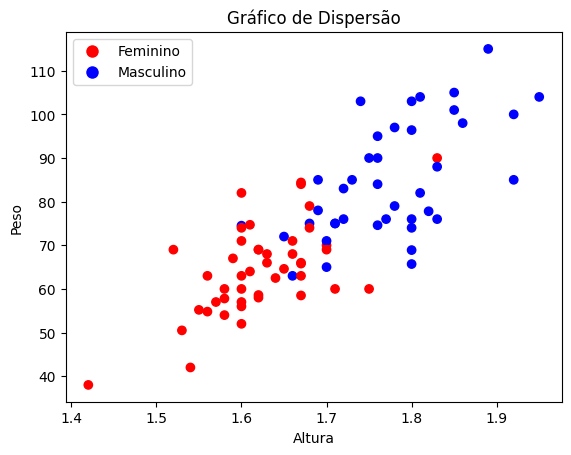

In [ ]:
# Mapeia os rótulos para cores para visualização
label_to_color = {
    'Feminino': 'red',
    'Masculino': 'blue'
}

# Criar uma lista de cores com base nos rótulos
point_colors = [label_to_color[label] for label in data.iloc[:, 3]]

# Cria um gráfico de dispersão dos dados com cores mapeadas
x1 = data.iloc[:, 1]
x2 = data.iloc[:, 2]
scatter = plt.scatter(x1, x2, c=point_colors, cmap='coolwarm')

# Legendas e rótulos para o gráfico
legend_labels = list(label_to_color.keys())  # Usar as chaves do dicionário como rótulos da legenda
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=label_to_color[label], markersize=10, label=label) for label in legend_labels]
plt.legend(handles=legend_handles)
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Gráfico de Dispersão')
plt.show()

In [ ]:
# Imprime a distribuição de gênero no conjunto de dados
categorias_list = list(data.iloc[:, 3].value_counts().index)
valores_list = list(data.iloc[:, 3].value_counts().values)
total = sum(valores_list)
for i in range(len(categorias_list)):
    print(f'{categorias_list[i]}: {valores_list[i]} - {round(valores_list[i]/total*100, 1)}%')

Feminino: 45 - 52.9%
Masculino: 40 - 47.1%


In [ ]:
# Bibliotecas do SVM
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Separa os dados em características e rótulos
X = data.iloc[:, 1:3].values
y = data.iloc[:, 4].values

In [ ]:
# Divide os dados em treino e teste
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.3, random_state=9)

In [ ]:
# Normaliza os dados
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train0)
X_test = scaler.transform(X_test0)
y_train = y_train0
y_test  = y_test0

## Regressão Logística

In [ ]:
# Cria e treina um modelo de regressão logística
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Prediz e avalia o modelo de regressão logística
y_pred = model_lr.predict(X_test)
Acuracia = accuracy_score(y_test, y_pred)
print("Acurácia:", Acuracia)

Acurácia: 0.8846153846153846


In [ ]:
# Testa uma nova instância com o modelo
x_new = scaler.transform(np.array([[1.74, 80]]))
model_lr.predict(x_new)[0]

1

# Regressão Logistica com Melhoria

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
#Balancear as classes
# O Balencamento de Clases melhorou significativamente

# Prediz e avalia o modelo de regressão logística
model_lr = LogisticRegression(class_weight='balanced')
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
Acuracia = accuracy_score(y_test, y_pred)
print("Acurácia:", Acuracia)


# Calculando as métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisão:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Acurácia: 0.8846153846153846
Precisão: 1.0
Recall: 0.7272727272727273
F1 Score: 0.8421052631578948


## KNN

In [ ]:
# Cria, treina e avalia um modelo KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_pred = model_knn.predict(X_test)
acuraciaKnn = accuracy_score(y_test, y_pred)
print("Acurácia:", acuraciaKnn)

Acurácia: 0.8846153846153846


In [ ]:
# Nova instância
x_new = scaler.transform(np.array([[1.64, 82]]))
x_new

array([[0.27906977, 0.48837209]])

In [ ]:
# Testa uma nova instância com o modelo KNN
model_knn.predict(x_new)[0]

0

# KNN - Com Ajuste de Parametros

In [ ]:
from sklearn.model_selection import GridSearchCV

# Range de valores para 'n_neighbors' que queremos testar
param_grid = {
    'n_neighbors': list(range(1, 51)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


# Usando GridSearchCV para otimizar o KNN
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print(f"Melhor valor para n_neighbors: {grid_knn.best_params_}")
print(f"Melhor acurácia com o KNN: {grid_knn.best_score_}")

y_pred = grid_knn.predict(X_test)

# Calcule a acurácia
Acuracia = accuracy_score(y_test, y_pred)
print("Acurácia:", Acuracia)


model_knn_alterado = KNeighborsClassifier(n_neighbors=8, algorithm='auto', weights='uniform')
model_knn_alterado.fit(X_train, y_train)

y_pred = model_knn_alterado.predict(X_test)
Acuracia = accuracy_score(y_test, y_pred)
print("Acurácia:", Acuracia)

Melhor valor para n_neighbors: {'algorithm': 'auto', 'n_neighbors': 19, 'weights': 'distance'}
Melhor acurácia com o KNN: 0.9
Acurácia: 0.9230769230769231
Acurácia: 0.9230769230769231


In [ ]:
# Função para plotar os limites de decisão dos modelos
def plot_decision_boundary(estimator, X, y):
    X_color = X
    y_color = np.vectorize(lambda r: 'red' if r == 0 else 'blue')(y)
    x_axis, y_axis = np.arange(-.5, 1.5, .005), np.arange(-.5, 1.5, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color[:, 0], X_color[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel= 'Altura',
        ylabel= 'Peso',
        title=str(estimator))

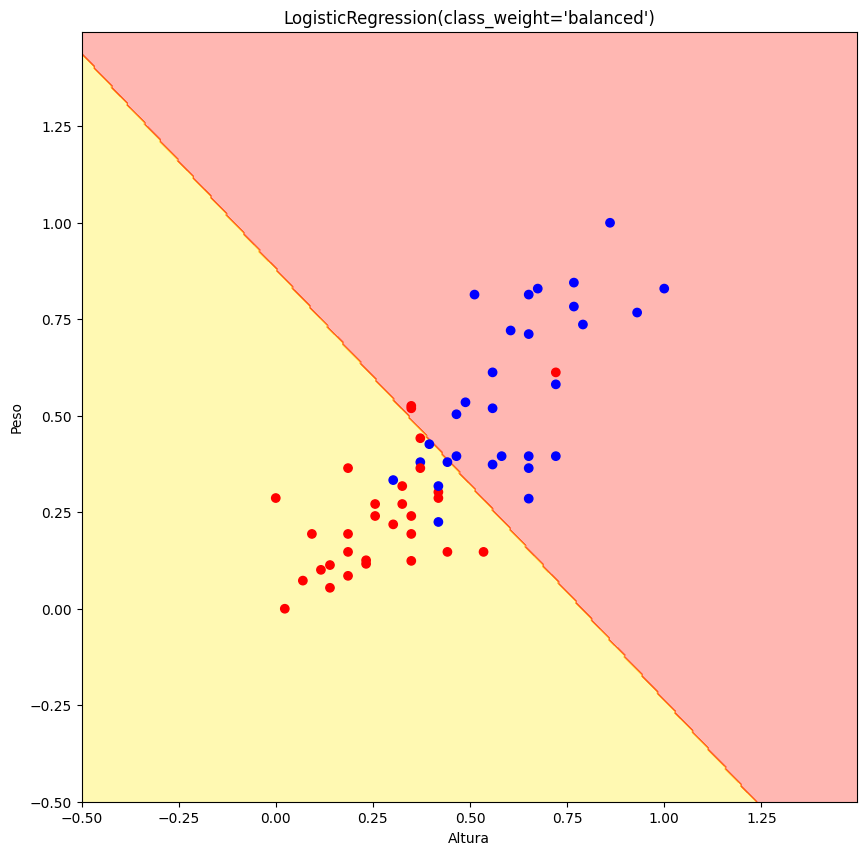

In [ ]:
# Chart com os dados de Treino - lr
plot_decision_boundary(model_lr, X_train, y_train)

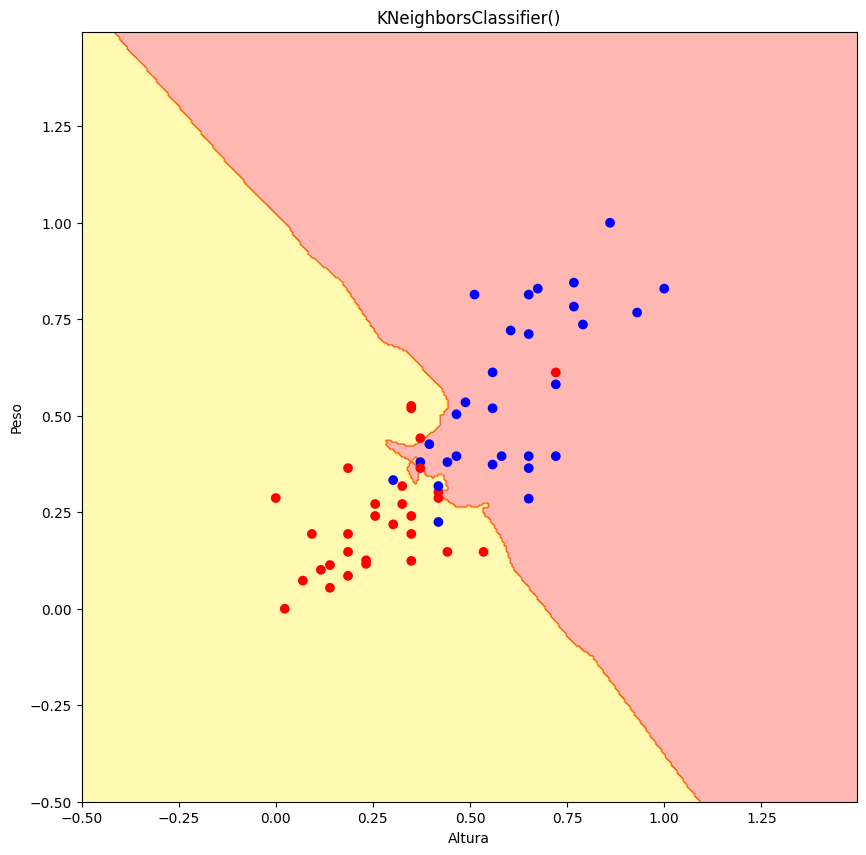

In [ ]:
# Chart com os dados de Treino - knn
plot_decision_boundary(model_knn, X_train, y_train)

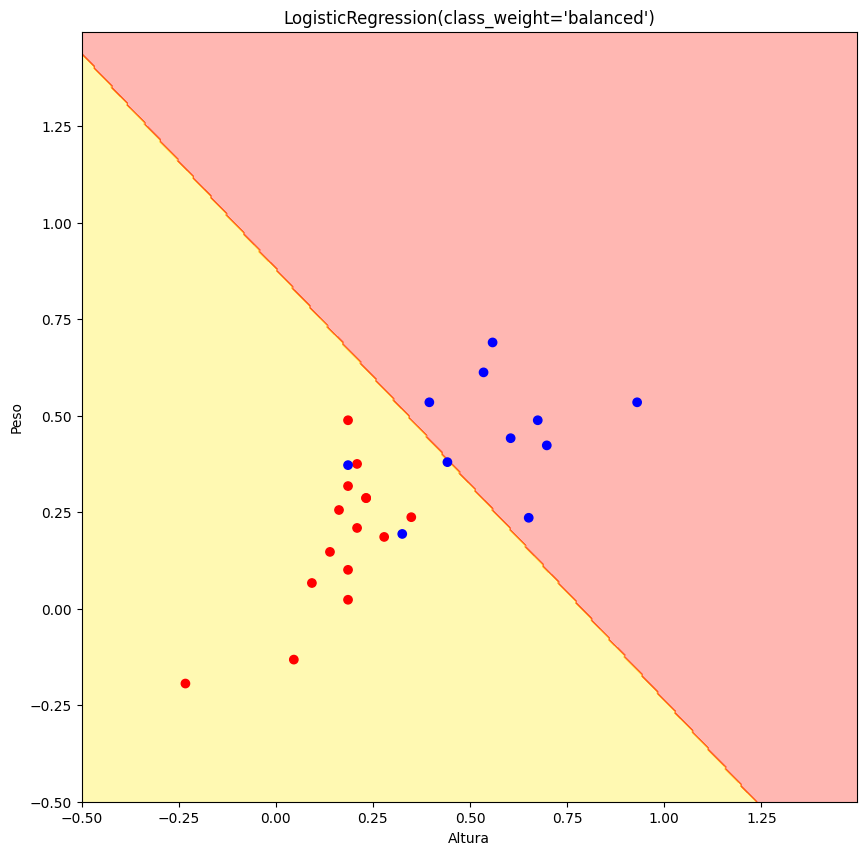

In [ ]:
# Chart com os dados de Test - lr
plot_decision_boundary(model_lr, X_test, y_test)

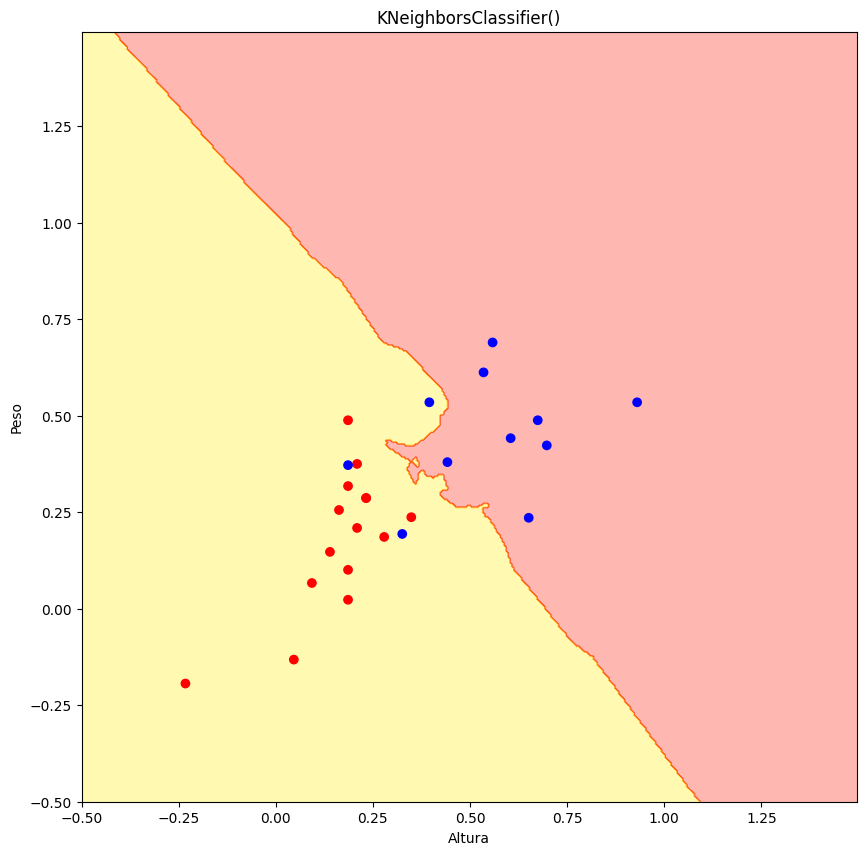

In [ ]:
# Chart com os dados de Test - Knn
plot_decision_boundary(model_knn, X_test, y_test)

## Multi Layer Perceptron

In [ ]:
# Bibliotecas
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
# Montagem do modelo
# Os modelos sequenciais são uma pilha linear de camadas de redes neurais.
model_mlp = Sequential()

# Layer de tamanho 32 e 2 atributos (altura e peso) cada camada com 8 neurónios
#A função de ativação utilizada é a tangente hiperbólica (tanh)
model_mlp.add(Dense(8, input_shape=(2,), activation='tanh'))
#A função de ativação aqui é a sigmoid.
model_mlp.add(Dense(8, activation='sigmoid'))
# Layer de saída
# A função de ativação softmax é geralmente usada em camadas de saída de problemas de classificação, pois produz uma distribuição de probabilidade entre as classes.
model_mlp.add(Dense(2, activation='softmax'))

#O modelo é compilado usando a perda de entropia cruzada categórica esparsa (útil quando os rótulos das classes são inteiros)
# e o otimizador "adam". Além disso, a métrica de precisão será monitorada durante o treinamento.
model_mlp.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 5
epochs = 100
history = model_mlp.fit(X_train, y_train,
                        batch_size= batch_size,
                        epochs= epochs,
                        verbose= 1,
                        validation_split= 0.2)

Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 1.3461 - accuracy: 0.5106 - val_loss: 1.3487 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 1.2813 - accuracy: 0.5106 - val_loss: 1.2858 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 1.2269 - accuracy: 0.5106 - val_loss: 1.2220 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 1.1692 - accuracy: 0.5106 - val_loss: 1.1674 - val_accuracy: 0.5000
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 1.1178 - accuracy: 0.5106 - val_loss: 1.1160 - val_accuracy: 0.5000
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 1.0703 - accuracy: 0.5106 - val_loss: 1.0700 - val_accuracy: 0.5000
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 1.0270 - accuracy: 0.5106 - val_loss: 1.0281 - val_accuracy: 0.5000
Epoch 8/100


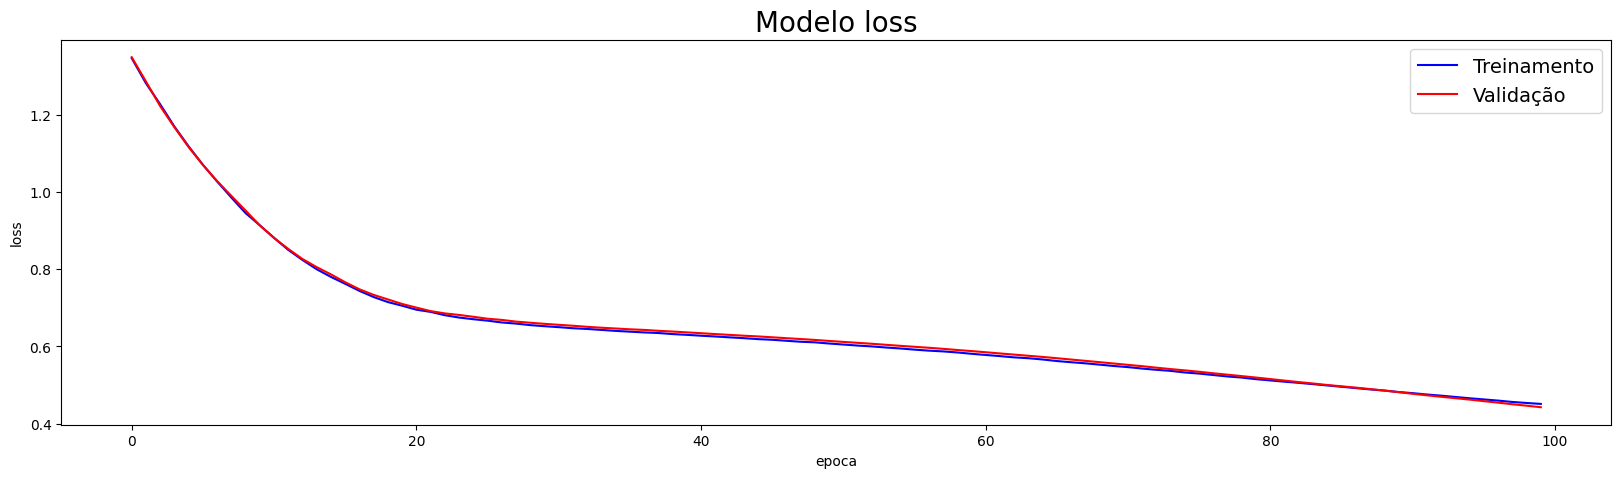

In [ ]:
# Plotando o historico do processo de treinamento
# O código seguinte plota o histórico de perda (loss) do treinamento
#e validação ao longo das épocas. Isso é útil para verificar o overfitting.
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='red')
plt.title('Modelo loss', fontsize=20)
plt.ylabel('loss')
plt.xlabel('epoca')
plt.legend(['Treinamento', 'Validação'], loc='upper right', fontsize=14)
plt.show()

In [ ]:
# Avaliação
score = model_mlp.evaluate(X_test, y_test, verbose=0)
print('Teste loss:', score[0])
print('Teste Acuracia:', score[1])

Teste loss: 0.41828078031539917
Teste Acuracia: 0.9230769276618958


In [ ]:
# Nova instância
x_new = scaler.transform(np.array([[1.74, 80]]))
x_new

array([[0.51162791, 0.45736434]])

In [ ]:
# Predição nova instância
result = model_mlp.predict(x_new)
result

1/1 [==============================] - 0s 285ms/step


array([[0.41915756, 0.58084244]], dtype=float32)

In [ ]:
# Resultado é o índice do vetor com o valor maior
np.argmax(result)

1

In [ ]:
np.array(np.argmax(result))

array(1)

In [ ]:
# Adaptação do predict
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model
    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.array(np.argmax(y_pred, axis=1))

model_mlp1=Onehot2Int(model_mlp)

5000/5000 [==============================] - 7s 1ms/step


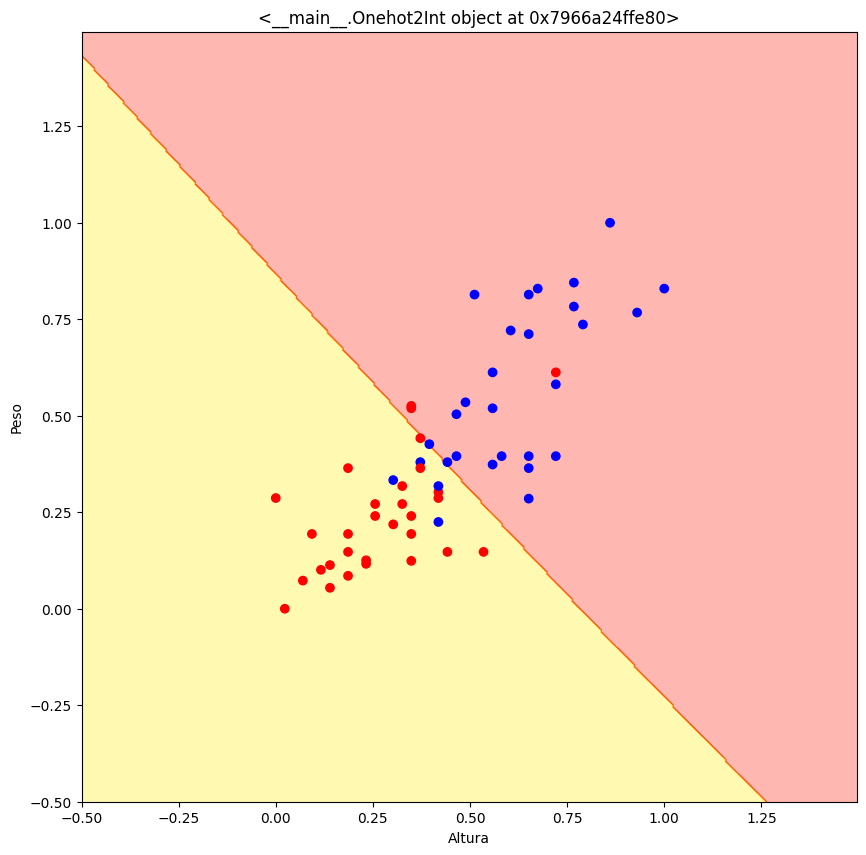

In [ ]:
# Chart com os dados de Train - MLP
plot_decision_boundary(model_mlp1, X_train, y_train)

5000/5000 [==============================] - 7s 1ms/step


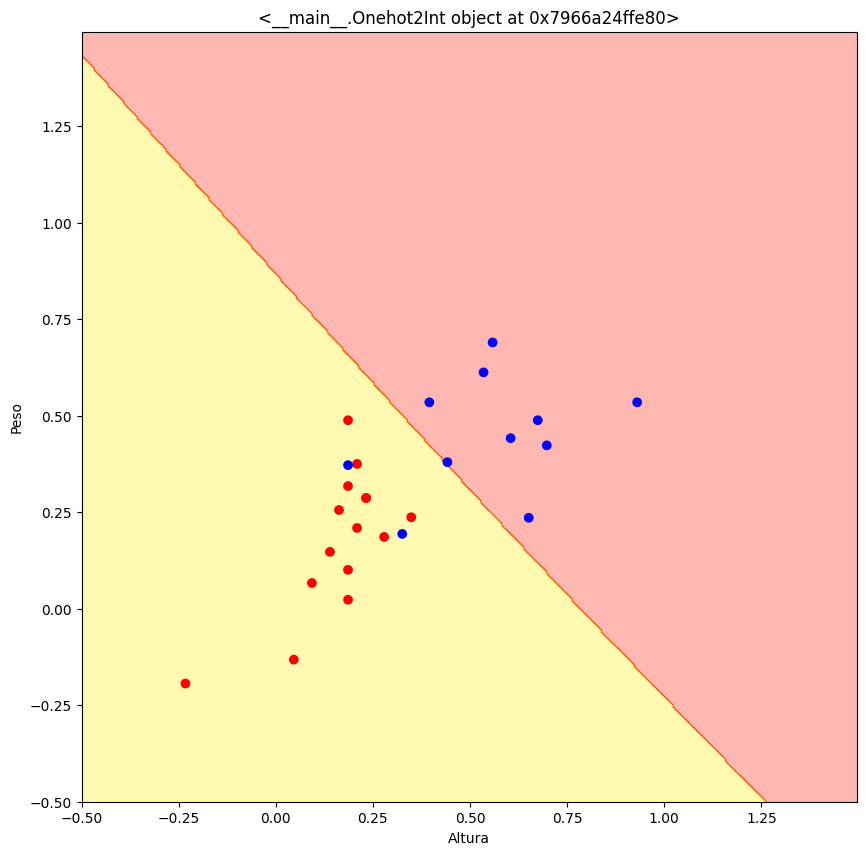

In [ ]:
# Chart com os dados de Test - MLP
plot_decision_boundary(model_mlp1, X_test, y_test)

# MPL tentando reduzir o Overfitting e o underfitting

In [ ]:
from keras.layers import Dropout

model_mlp = Sequential()
model_mlp.add(Dense(8, input_shape=(2,), activation='tanh'))
model_mlp.add(Dropout(0.5))  # Adicionando Dropout
model_mlp.add(Dense(8, activation='sigmoid'))
model_mlp.add(Dense(2, activation='softmax'))
model_mlp.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 5
epochs = 100
history = model_mlp.fit(X_train, y_train,
                        batch_size= batch_size,
                        epochs= epochs,
                        verbose= 1,
                        validation_split= 0.2)

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 0.7723 - accuracy: 0.5106 - val_loss: 0.7704 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7555 - accuracy: 0.5106 - val_loss: 0.7575 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7538 - accuracy: 0.5106 - val_loss: 0.7443 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.7245 - accuracy: 0.5106 - val_loss: 0.7349 - val_accuracy: 0.5000
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7160 - accuracy: 0.5106 - val_loss: 0.7265 - val_accuracy: 0.5000
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.7026 - accuracy: 0.5106 - val_loss: 0.7201 - val_accuracy: 0.5000
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.7067 - accuracy: 0.5106 - val_loss: 0.7125 - val_accuracy: 0.5000
Epoch 8/100


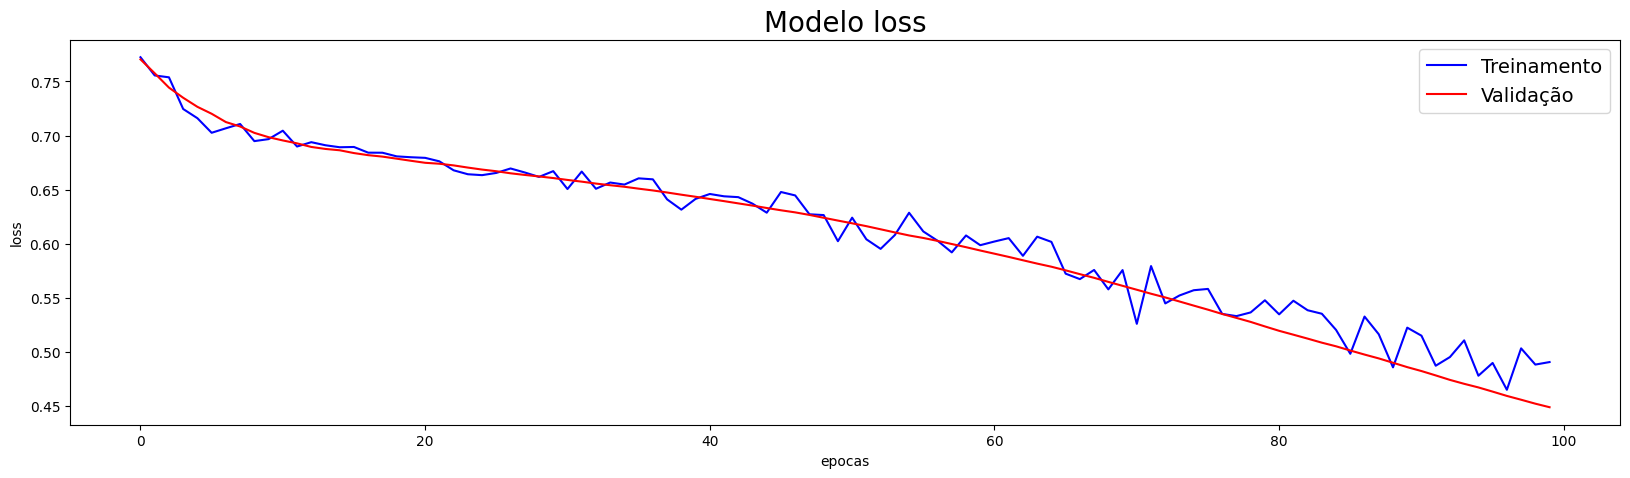

In [ ]:
# Plotando o historico do processo de treinamento
# O código seguinte plota o histórico de perda (loss) do treinamento
#e validação ao longo das épocas. Verificaa o overfitting.
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='red')
plt.title('Modelo loss', fontsize=20)
plt.ylabel('loss')
plt.xlabel('epocas')
plt.legend(['Treinamento', 'Validação'], loc='upper right', fontsize=14)
plt.show()

In [ ]:
# Avaliação
score = model_mlp.evaluate(X_test, y_test, verbose=0)
print('Teste loss:', score[0])
print('Teste Aacuracia:', score[1])

Teste loss: 0.43499550223350525
Teste Aacuracia: 0.9230769276618958


In [ ]:
# Adaptação do predict
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model
    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.array(np.argmax(y_pred, axis=1))

model_mlp1=Onehot2Int(model_mlp)

5000/5000 [==============================] - 7s 1ms/step


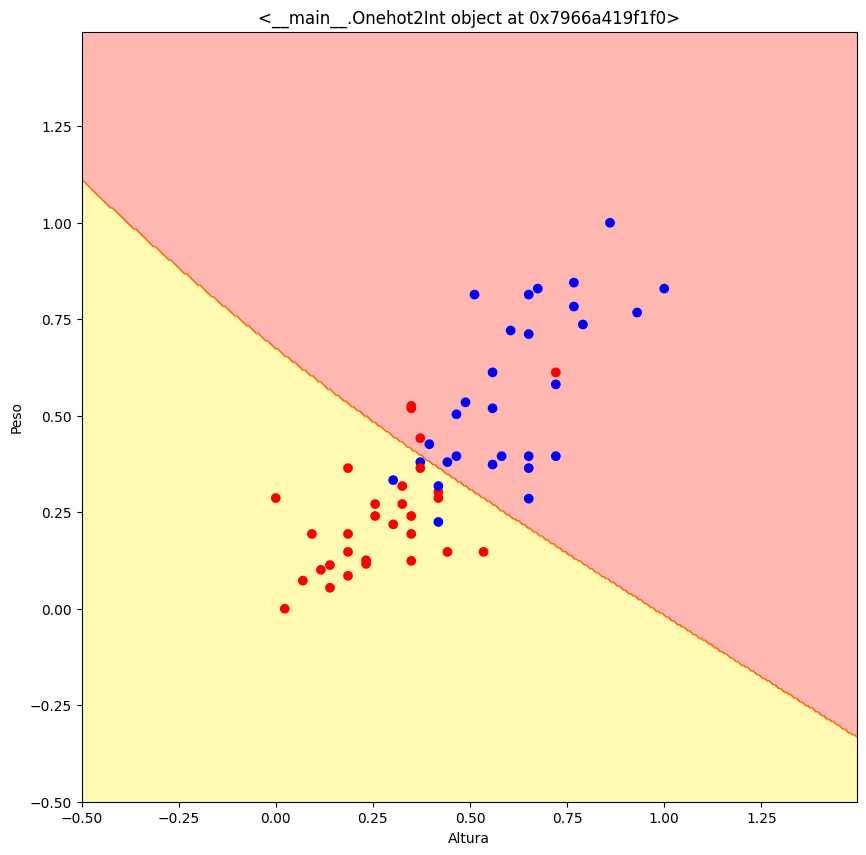

In [ ]:
# Chart com os dados de Train - MLP
plot_decision_boundary(model_mlp1, X_train, y_train)

Testando com o Perceptron

In [ ]:
def treino_perceptron(dados, labels, taxa_aprendizado=0.1, epocas=100):
    # Supondo que cada dado em "dados" tenha o mesmo número de características
    n_entradas = len(dados[0])
    pesos = [0.0] * n_entradas
    bias = 0.0

    for _ in range(epocas):
        for entrada, label in zip(dados, labels):
            ativacao = sum([pesos[i]*entrada[i] for i in range(n_entradas)]) + bias
            predicao = 1.0 if ativacao >= 0.0 else 0.0
            erro = label - predicao
            for i in range(n_entradas):
                pesos[i] += taxa_aprendizado * erro * entrada[i]
            bias += taxa_aprendizado * erro

    return pesos, bias

In [ ]:
class Perceptron:
    def __init__(self, taxa_aprendizado=0.1, epocas=100):
        self.taxa_aprendizado = taxa_aprendizado
        self.epocas = epocas
        self.pesos = None
        self.bias = None

    def fit(self, dados, labels):
        self.pesos, self.bias = treino_perceptron(dados, labels, self.taxa_aprendizado, self.epocas)

    def predict(self, entradas):
        n_entradas = len(entradas[0])
        predicoes = []

        for entrada in entradas:
            ativacao = sum([self.pesos[i]*entrada[i] for i in range(n_entradas)]) + self.bias
            predicao = 1.0 if ativacao >= 0.0 else 0.0
            predicoes.append(predicao)

        return predicoes

    def evaluate(self, entradas, labels_verdadeiros):
        predicoes = self.predict(entradas)
        corretas = sum(1 for p, verdadeiro in zip(predicoes, labels_verdadeiros) if p == verdadeiro)
        acuracia = corretas / len(labels_verdadeiros)
        return acuracia

In [ ]:
# Criando um objeto Perceptron
modelo = Perceptron()

# Treinando o modelo
modelo.fit(X_train, y_train)

# Fazendo predições
predicoes = modelo.predict(X_test)

# Avaliando o modelo
acuracia = modelo.evaluate(X_test, y_test)
print(f"Acurácia: {acuracia*100:.2f}%")

Acurácia: 84.62%


Houve uma melhora em todos os modelos com uma base de teste de 30% mas o Modelo do MLP a acurácia apresentou uma melhoria siginificativa saltando de 86% para 92%

#Comparação dos Resultados dos Modelos

Modelo	Acurácia
1. Regressão Logística	0.8846
2. Regressão Logística com Melhoria	0.8846
3. KNN	0.8846
4. KNN Com Ajuste de Parâmetros	0.9231 (Tanto para grid quanto model alterado)
5. Multi Layer Perceptron	0.9231
6. MLP reduzindo Overfitting e Underfitting	0.9231
7. Perceptron	0.8462


**Escolha do Modelo**:

Eu escolheria o **Multi Layer Perceptron reduzindo Overfitting e Underfitting** ou o **KNN com Ajuste de Parâmetros**. Ambos apresentam uma acurácia alta de 0.9231, indicando desempenho semelhante.

In [ ]:
# Certifique-se de que os dados estão normalizados
X_pred_scaled = scaler.transform(X_pred)

# Fazendo previsões
predictions = model_mlp.predict(X_pred_scaled)

# Obtendo as classes previstas
predicted_classes = predictions.argmax(axis=1)

# Mapeando para rótulos
labels = ["Feminino", "Masculino"]
predicted_labels = [labels[i] for i in predicted_classes]

print(predicted_labels)


NameError: ignored